In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_beer=pd.read_csv("Consumo_cerveja.csv")
df_beer.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,01-01-2015,27.30,23.9,32.5,0.0,0,25.461
1,02-01-2015,27.02,24.5,33.5,0.0,0,28.972
2,03-01-2015,24.82,22.4,29.9,0.0,1,30.814
3,04-01-2015,23.98,21.5,28.6,1.2,1,29.799
4,05-01-2015,23.82,21.0,28.3,0.0,0,28.900


In [3]:
df_beer.shape

(365, 7)

In [4]:
## Renaming the column names
df_beer.rename(columns={'Data':'Date'},inplace=True)
df_beer.rename(columns={'Temperatura Media (C)':'MedTemp'},inplace=True)
df_beer.rename(columns={'Temperatura Minima (C)':'MinTemp'},inplace=True)
df_beer.rename(columns={'Temperatura Maxima (C)':'MaxTemp'},inplace=True)
df_beer.rename(columns={'Precipitacao (mm)':'Precipitation'},inplace=True)
df_beer.rename(columns={'Final de Semana':'EndofWeek'},inplace=True)
df_beer.rename(columns={'Consumo de cerveja (litros)':'Beerconsumption'},inplace=True)

In [5]:
df_beer.head()

,Date,MedTemp,MinTemp,MaxTemp,Precipitation,EndofWeek,Beerconsumption
0,01-01-2015,27.30,23.9,32.5,0.0,0,25.461
1,02-01-2015,27.02,24.5,33.5,0.0,0,28.972
2,03-01-2015,24.82,22.4,29.9,0.0,1,30.814
3,04-01-2015,23.98,21.5,28.6,1.2,1,29.799
4,05-01-2015,23.82,21.0,28.3,0.0,0,28.900


In [6]:
### The Date column is of no use in the model building hence we drop it 

df_beer.drop(['Date'],axis=1,inplace=True)

In [8]:
df_beer.head()

,MedTemp,MinTemp,MaxTemp,Precipitation,EndofWeek,Beerconsumption
0,27.30,23.9,32.5,0.0,0,25.461
1,27.02,24.5,33.5,0.0,0,28.972
2,24.82,22.4,29.9,0.0,1,30.814
3,23.98,21.5,28.6,1.2,1,29.799
4,23.82,21.0,28.3,0.0,0,28.900


In [9]:
df_beer.isnull().sum()

MedTemp            0
MinTemp            0
MaxTemp            0
Precipitation      0
EndofWeek          0
Beerconsumption    0
dtype: int64

In [10]:
df_beer.describe()

,MedTemp,MinTemp,MaxTemp,Precipitation,EndofWeek,Beerconsumption
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000


In [11]:
df_beer.corr()

,MedTemp,MinTemp,MaxTemp,Precipitation,EndofWeek,Beerconsumption
MedTemp,1.000000,0.862752,0.922513,0.024416,-0.050803,0.574615
MinTemp,0.862752,1.000000,0.672929,0.098625,-0.059534,0.392509
MaxTemp,0.922513,0.672929,1.000000,-0.049305,-0.040258,0.642672
Precipitation,0.024416,0.098625,-0.049305,1.000000,0.001587,-0.193784
EndofWeek,-0.050803,-0.059534,-0.040258,0.001587,1.000000,0.505981
Beerconsumption,0.574615,0.392509,0.642672,-0.193784,0.505981,1.000000


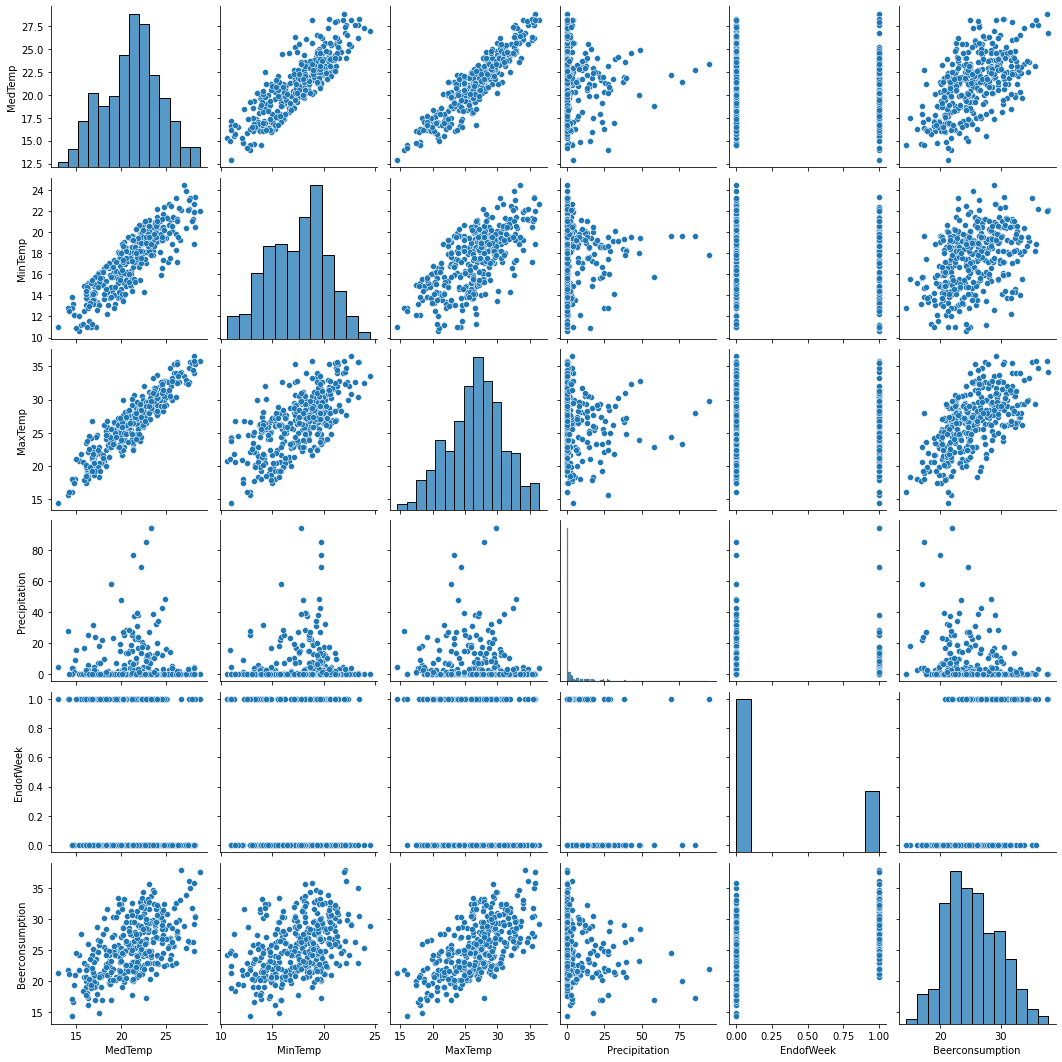

In [12]:
sns.pairplot(df_beer)

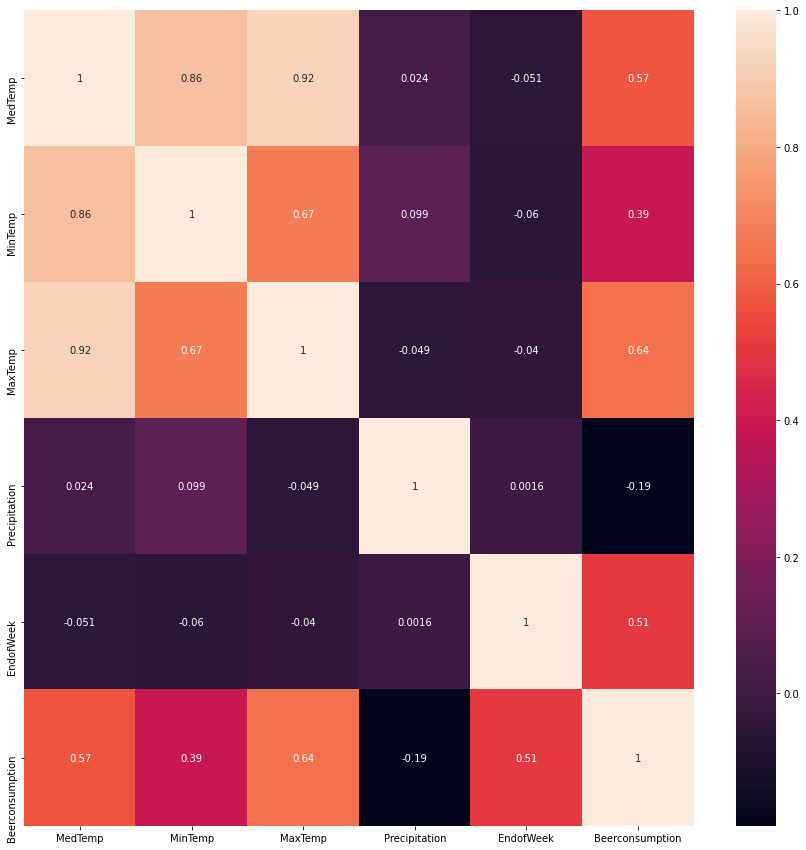

In [13]:
corrmat = df_beer.corr()
#top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [14]:
df_beer.head()

,MedTemp,MinTemp,MaxTemp,Precipitation,EndofWeek,Beerconsumption
0,27.30,23.9,32.5,0.0,0,25.461
1,27.02,24.5,33.5,0.0,0,28.972
2,24.82,22.4,29.9,0.0,1,30.814
3,23.98,21.5,28.6,1.2,1,29.799
4,23.82,21.0,28.3,0.0,0,28.900


In [15]:
#X=df_beer.iloc[:,0:-1]
#y=df_beer.iloc[:,-1]

X=df_beer.drop(['Beerconsumption'],axis=1)
y=df_beer['Beerconsumption']

In [16]:
X.head()

,MedTemp,MinTemp,MaxTemp,Precipitation,EndofWeek
0,27.30,23.9,32.5,0.0,0
1,27.02,24.5,33.5,0.0,0
2,24.82,22.4,29.9,0.0,1
3,23.98,21.5,28.6,1.2,1
4,23.82,21.0,28.3,0.0,0


In [17]:
y.head()

0    25.461
1    28.972
2    30.814
3    29.799
4    28.900
Name: Beerconsumption, dtype: float64

In [18]:
## Creating a Random Forest Model
from sklearn.model_selection import train_test_split
X_train,y_train,X_test,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [19]:
X_train.head()

,MedTemp,MinTemp,MaxTemp,Precipitation,EndofWeek
12,25.52,21.2,34.8,0.8,0
353,22.84,19.6,29.0,8.4,1
147,18.56,16.8,23.2,1.8,0
16,28.86,22.0,35.8,0.0,1
86,23.28,19.1,29.5,0.0,1


In [20]:
y_train.head()

,MedTemp,MinTemp,MaxTemp,Precipitation,EndofWeek
317,25.06,19.5,30.4,16.4,1
95,21.36,18.5,27.7,0.0,0
210,16.76,11.3,26.7,0.0,0
189,17.54,15.3,20.4,0.0,0
306,21.86,19.5,25.6,3.4,0


In [21]:
X_test.head()

12     26.990
353    30.127
147    24.683
16     37.690
86     29.760
Name: Beerconsumption, dtype: float64

In [22]:
y_test.head()

317    26.836
95     22.356
210    24.227
189    20.740
306    22.741
Name: Beerconsumption, dtype: float64

In [23]:
y_train1=X_test

In [24]:
y_train1.head()

12     26.990
353    30.127
147    24.683
16     37.690
86     29.760
Name: Beerconsumption, dtype: float64

In [25]:
X_test1=y_train

In [28]:
X_test1.head()

,MedTemp,MinTemp,MaxTemp,Precipitation,EndofWeek
317,25.06,19.5,30.4,16.4,1
95,21.36,18.5,27.7,0.0,0
210,16.76,11.3,26.7,0.0,0
189,17.54,15.3,20.4,0.0,0
306,21.86,19.5,25.6,3.4,0


In [31]:
## Fitting the Model with Default Hyperparameters

# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestRegressor

# Running the random forest with default parameters.
rfr = RandomForestRegressor()

In [32]:
rfr.fit(X_train,y_train1)

RandomForestRegressor()

In [33]:
# Making predictions
predictions = rfr.predict(X_test1)

c:\users\dell\anaconda3\envs\beer\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Beerconsumption', ylabel='Density'>

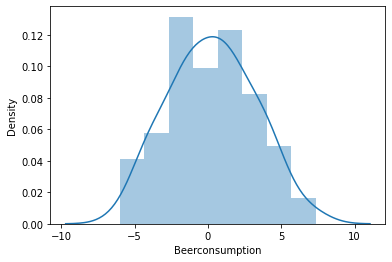

In [38]:
sns.distplot(y_test-predictions)

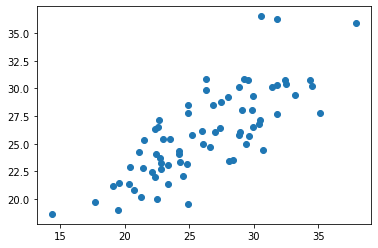

In [39]:
plt.scatter(y_test,predictions)

In [40]:
from sklearn import metrics

In [41]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.3871184931506844
MSE: 8.460388845228772
RMSE: 2.908674757553476


In [43]:
import pickle
# open a file, where you want to store the data
file = open('BeerConsumption_random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rfr, file)